time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1446
gap                1446
dmin               1469
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2052
depthError            5
magError           1470
magNst             1447
status                0
locationSource        0
magSource             0
dtype: int64


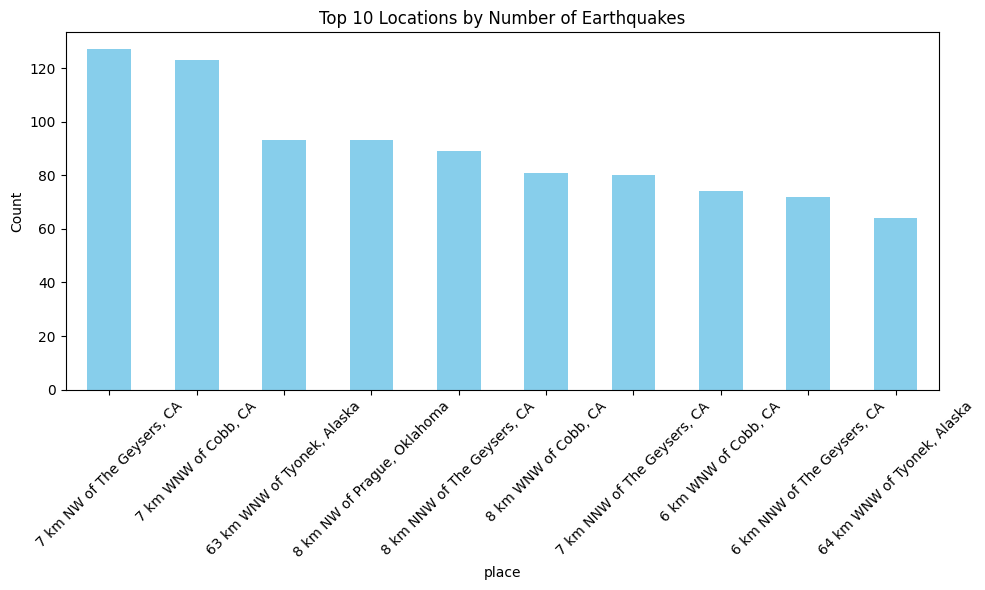

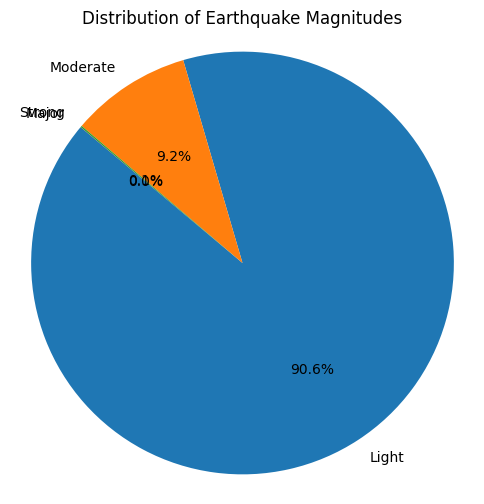

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (adjust the file path to where you've saved the dataset locally)
df = pd.read_csv('all_month.csv')  # Replace with your file name if it's different

# Preview the data
df.head()
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values or fill them appropriately
df = df.dropna(subset=['mag', 'depth', 'place', 'time'])  # Example

# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])

top_places = df['place'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_places.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations by Number of Earthquakes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
def classify_mag(mag):
    if mag < 4:
        return 'Light'
    elif mag < 6:
        return 'Moderate'
    elif mag < 7:
        return 'Strong'
    else:
        return 'Major'

df['mag_class'] = df['mag'].apply(classify_mag)

mag_counts = df['mag_class'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(mag_counts, labels=mag_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Earthquake Magnitudes')
plt.axis('equal')
plt.show()

